
* https://biopython.readthedocs.io/en/latest/chapter_cluster.html

In [1]:
import sys,os,shutil,subprocess
import numpy as np
import pandas as pd
import pylab as plt
import seaborn as sns
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio import Phylo
from Bio.Phylo.TreeConstruction import DistanceMatrix,DistanceTreeConstructor
from Bio.Cluster import distancematrix
from pathogenie import tools

In [2]:
df = pd.read_csv('maf_feature_matrix.csv')
X = df.iloc[:,3:].T

In [3]:
from sklearn import metrics
mat = metrics.pairwise_distances(X)
dfmat = pd.DataFrame(mat,index=X.index)
#sns.clustermap(dfmat,figsize=(14,8),col_cluster=False)
dfmat[:3]

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
GCA_000253355.1_ASM25335v1_genomic,0.000000,5.291503,4.123106,3.872983,4.898979,4.898979,9.433981,3.162278,4.690416,6.164414,...,4.472136,4.795832,5.477226,10.488088,7.615773,6.082763,9.746794,7.280110,7.211103,10.049876
GCA_000665865.1_Myco_afri_K85_V1_genomic,5.291503,0.000000,4.582576,5.196152,4.898979,4.898979,9.327379,5.477226,3.741657,6.000000,...,5.291503,4.582576,4.472136,10.583005,7.211103,6.403124,9.643651,7.681146,7.211103,10.049876
GCA_000666065.1_Myco_afri_MAL010084_V1_genomic,4.123106,4.582576,0.000000,4.472136,4.358899,4.123106,9.055385,3.605551,4.582576,5.916080,...,4.795832,4.472136,4.358899,10.246951,7.141428,5.656854,9.380832,7.483315,7.000000,9.797959


In [4]:
mat = distancematrix(X)
dfmat = pd.DataFrame(mat,index=X.index)
dfmat[:3]

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
GCA_000253355.1_ASM25335v1_genomic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GCA_000665865.1_Myco_afri_K85_V1_genomic,0.007189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GCA_000666065.1_Myco_afri_MAL010084_V1_genomic,0.004365,0.005392,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


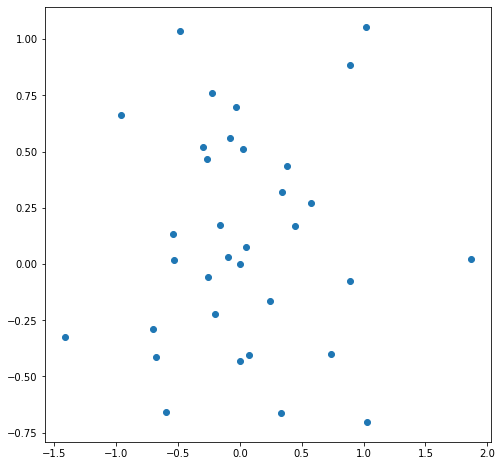

In [5]:
from Bio.Cluster import treecluster
tree = treecluster(X)
#print (tree)
from Bio.Cluster import kcluster
clusterid, error, nfound = kcluster(X)
clusterid
from Bio.Cluster import pca
columnmean, coordinates, components, eigenvalues = pca(X)

f,ax=plt.subplots(1,1,figsize=(8,8))
plt.scatter(x=coordinates[1],y=coordinates[2])

In [6]:
names = list(X.index)
names = [i[16:] for i in names]
new=[]
for i in mat:
    new.append(np.insert(i, 0, 0).tolist())

dm = DistanceMatrix(names,new)
constructor = DistanceTreeConstructor()
tree = constructor.nj(dm)

In [ ]:
dm.matrix

In [ ]:
f,ax=plt.subplots(1,1,figsize=(13,10))
ax.axis('off')
Phylo.draw(tree,axes=ax)

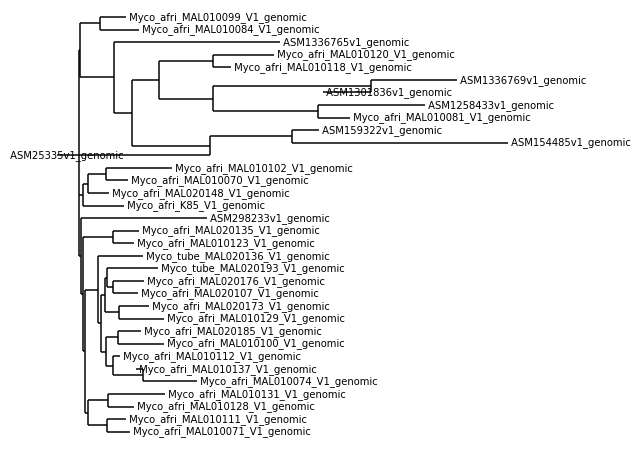

(<Figure size 720x576 with 1 Axes>, Tree(rooted=False))

In [7]:
tools.draw_tree(tree)

In [182]:
Phylo.draw_ascii(tree,file=open('temp.txt','w'))